In [1]:
import sys, os
import numpy as np
sys.path.append('../src/')
import torch
from MolGraphNetwork import MolGraphNetwork
from scf_guess_tools import Backend

BASIS_PATH = "pcseg-1"
GEOMETRY_Source = "/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MGNN = MolGraphNetwork(xyz_source=GEOMETRY_Source,
                       basis=BASIS_PATH,
                       backend=Backend.PY,
                       batch_size=16,
                       hidden_dim=512,
                       train_val_test_ratio=(0.8, 0.1, 0.1), 
                       message_passing_steps=3,
                       edge_threshold_val=5,
                       message_net_layers=3,
                       message_net_dropout=0.1,
                       target="density",
                       data_aug_factor=3,
                       verbose_level=2)
MGNN.load_data(max_samples=500,
               cache_meta = {"method":"dft", "basis":None, "functional": "b3lypg", "guess": "minao", "backend": "pyscf", "cache": "/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/out/c7h10o2_b3lypg_pcseg1/pyscf"})

Setting verbose level to: 2
Loading 6095 files from /home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted...
Limiting to 500 samples out of 6095 total files.


Loading files: 100%|██████████| 500/500 [00:00<00:00, 1291.12it/s]
Creating graphs: 500it [00:06, 74.86it/s]


Augmenting training set by factor 3 -> 800 additional training samples.


Augmenting data: 100%|██████████| 800/800 [01:10<00:00, 11.38it/s]


Total samples: 1300, Train: 1200 (with 800 / 1200 augmented samples), Val: 50, Test: 50
Found 3 center keys (['C', 'H', 'O']) and 6 edge keys (['C_C', 'C_H', 'C_O', 'H_H', 'H_O', 'O_O']) in the training set. -> Totaling 9 unique encoder/decoder.
Normalization factors computed and applied.
Center stats: {'C': (0.15901810980978467, 0.3491067062811787), 'H': (0.376943039894104, 0.46880099786953633), 'O': (0.15833881823789506, 0.34832057182776954)}, Edge stats: {'C_C': (0.005203392276582287, 0.08870757630768851), 'C_H': (0.008201694102173147, 0.0875578799060017), 'C_O': (0.0020975181394357087, 0.06436320194108218), 'H_H': (0.011910752880963035, 0.05712352702605573), 'H_O': (0.002716084962812444, 0.045034228967302366), 'O_O': (-0.00036909701701809096, 0.015806815823707576)}
First train batch: 304 atoms, 4950 edges, 304 center blocks.
Found center block size 105 for atom type O.
Found center block size 105 for atom type C.
Found center block size 15 for atom type H.
Found edge block size 196

In [ ]:
RETRAIN = False
model_name = "MGNN_pcseg1_simple_AUG"
if not RETRAIN and os.path.exists(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth"):
    MGNN.load_model(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth")
else:
    MGNN.train_model(num_epochs=50, lr=1e-3, weight_decay=1e-5, model_save_path=f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth")
    MGNN.save_model(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth")

Epoch 1 [Train]: 100%|██████████| 75/75 [02:28<00:00,  1.98s/it]


Epoch 1/50 → Avg Train Loss: 132.111917


Epoch 1 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]


Epoch 1/50 → Avg Val   Loss: 97.918001
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 2 [Train]: 100%|██████████| 75/75 [02:30<00:00,  2.00s/it]


Epoch 2/50 → Avg Train Loss: 94.900900


Epoch 2 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]


Epoch 2/50 → Avg Val   Loss: 89.868776
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 3 [Train]: 100%|██████████| 75/75 [02:29<00:00,  1.99s/it]


Epoch 3/50 → Avg Train Loss: 91.336867


Epoch 3 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


Epoch 3/50 → Avg Val   Loss: 88.031528
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 4 [Train]: 100%|██████████| 75/75 [02:34<00:00,  2.06s/it]


Epoch 4/50 → Avg Train Loss: 89.616288


Epoch 4 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]


Epoch 4/50 → Avg Val   Loss: 86.736744
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 5 [Train]: 100%|██████████| 75/75 [02:35<00:00,  2.07s/it]


Epoch 5/50 → Avg Train Loss: 88.131725


Epoch 5 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


Epoch 5/50 → Avg Val   Loss: 85.607042
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 6 [Train]: 100%|██████████| 75/75 [02:36<00:00,  2.08s/it]


Epoch 6/50 → Avg Train Loss: 86.986969


Epoch 6 [Val]: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


Epoch 6/50 → Avg Val   Loss: 84.902742
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 7 [Train]: 100%|██████████| 75/75 [02:38<00:00,  2.11s/it]


Epoch 7/50 → Avg Train Loss: 86.089987


Epoch 7 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]


Epoch 7/50 → Avg Val   Loss: 84.435478
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 8 [Train]: 100%|██████████| 75/75 [02:39<00:00,  2.12s/it]


Epoch 8/50 → Avg Train Loss: 85.461774


Epoch 8 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


Epoch 8/50 → Avg Val   Loss: 84.129044
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 9 [Train]: 100%|██████████| 75/75 [02:42<00:00,  2.16s/it]


Epoch 9/50 → Avg Train Loss: 84.981833


Epoch 9 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


Epoch 9/50 → Avg Val   Loss: 83.864954
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 10 [Train]: 100%|██████████| 75/75 [02:44<00:00,  2.19s/it]


Epoch 10/50 → Avg Train Loss: 84.616195


Epoch 10 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]


Epoch 10/50 → Avg Val   Loss: 83.638374
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 11 [Train]: 100%|██████████| 75/75 [02:46<00:00,  2.22s/it]


Epoch 11/50 → Avg Train Loss: 84.359888


Epoch 11 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


Epoch 11/50 → Avg Val   Loss: 83.490942
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 12 [Train]: 100%|██████████| 75/75 [02:45<00:00,  2.20s/it]


Epoch 12/50 → Avg Train Loss: 84.138980


Epoch 12 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]


Epoch 12/50 → Avg Val   Loss: 83.297396
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 13 [Train]: 100%|██████████| 75/75 [02:48<00:00,  2.25s/it]


Epoch 13/50 → Avg Train Loss: 83.983885


Epoch 13 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


Epoch 13/50 → Avg Val   Loss: 83.074320
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 14 [Train]: 100%|██████████| 75/75 [02:43<00:00,  2.18s/it]


Epoch 14/50 → Avg Train Loss: 83.886702


Epoch 14 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]


Epoch 14/50 → Avg Val   Loss: 83.004320
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 15 [Train]: 100%|██████████| 75/75 [02:49<00:00,  2.25s/it]


Epoch 15/50 → Avg Train Loss: 83.721942


Epoch 15 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


Epoch 15/50 → Avg Val   Loss: 83.036480


Epoch 16 [Train]: 100%|██████████| 75/75 [02:57<00:00,  2.36s/it]


Epoch 16/50 → Avg Train Loss: 83.551149


Epoch 16 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.51it/s]


Epoch 16/50 → Avg Val   Loss: 82.952511
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 17 [Train]: 100%|██████████| 75/75 [02:43<00:00,  2.18s/it]


Epoch 17/50 → Avg Train Loss: 83.431119


Epoch 17 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]


Epoch 17/50 → Avg Val   Loss: 82.834965
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 18 [Train]: 100%|██████████| 75/75 [02:48<00:00,  2.24s/it]


Epoch 18/50 → Avg Train Loss: 83.315054


Epoch 18 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


Epoch 18/50 → Avg Val   Loss: 82.763868
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 19 [Train]: 100%|██████████| 75/75 [02:48<00:00,  2.25s/it]


Epoch 19/50 → Avg Train Loss: 83.202812


Epoch 19 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]


Epoch 19/50 → Avg Val   Loss: 82.647078
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 20 [Train]: 100%|██████████| 75/75 [02:49<00:00,  2.26s/it]


Epoch 20/50 → Avg Train Loss: 83.103360


Epoch 20 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]


Epoch 20/50 → Avg Val   Loss: 82.700697


Epoch 21 [Train]: 100%|██████████| 75/75 [02:49<00:00,  2.26s/it]


Epoch 21/50 → Avg Train Loss: 83.015531


Epoch 21 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]


Epoch 21/50 → Avg Val   Loss: 82.682434


Epoch 22 [Train]: 100%|██████████| 75/75 [02:48<00:00,  2.25s/it]


Epoch 22/50 → Avg Train Loss: 82.931103


Epoch 22 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


Epoch 22/50 → Avg Val   Loss: 82.651463


Epoch 23 [Train]: 100%|██████████| 75/75 [02:59<00:00,  2.39s/it]


Epoch 23/50 → Avg Train Loss: 82.853007


Epoch 23 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]


Epoch 23/50 → Avg Val   Loss: 82.672428


Epoch 24 [Train]: 100%|██████████| 75/75 [02:59<00:00,  2.40s/it]


Epoch 24/50 → Avg Train Loss: 82.777900


Epoch 24 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]


Epoch 24/50 → Avg Val   Loss: 82.701660


Epoch 25 [Train]: 100%|██████████| 75/75 [03:01<00:00,  2.42s/it]


Epoch 25/50 → Avg Train Loss: 82.701550


Epoch 25 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]


Epoch 25/50 → Avg Val   Loss: 82.740355


Epoch 26 [Train]: 100%|██████████| 75/75 [02:55<00:00,  2.34s/it]


Epoch 26/50 → Avg Train Loss: 82.045624


Epoch 26 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


Epoch 26/50 → Avg Val   Loss: 82.080460
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


Epoch 27 [Train]: 100%|██████████| 75/75 [03:10<00:00,  2.54s/it]


Epoch 27/50 → Avg Train Loss: 81.940533


Epoch 27 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.57it/s]


Epoch 27/50 → Avg Val   Loss: 82.154692


Epoch 28 [Train]: 100%|██████████| 75/75 [03:13<00:00,  2.57s/it]


Epoch 28/50 → Avg Train Loss: 81.893816


Epoch 28 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]


Epoch 28/50 → Avg Val   Loss: 82.200043


Epoch 29 [Train]: 100%|██████████| 75/75 [03:27<00:00,  2.76s/it]


Epoch 29/50 → Avg Train Loss: 81.854134


Epoch 29 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]


Epoch 29/50 → Avg Val   Loss: 82.229027


Epoch 30 [Train]: 100%|██████████| 75/75 [03:08<00:00,  2.52s/it]


Epoch 30/50 → Avg Train Loss: 81.816697


Epoch 30 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


Epoch 30/50 → Avg Val   Loss: 82.258081


Epoch 31 [Train]: 100%|██████████| 75/75 [03:11<00:00,  2.56s/it]


Epoch 31/50 → Avg Train Loss: 81.779992


Epoch 31 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.56it/s]


Epoch 31/50 → Avg Val   Loss: 82.289915


Epoch 32 [Train]: 100%|██████████| 75/75 [03:20<00:00,  2.68s/it]


Epoch 32/50 → Avg Train Loss: 81.743709


Epoch 32 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]


Epoch 32/50 → Avg Val   Loss: 82.322418


Epoch 33 [Train]: 100%|██████████| 75/75 [03:10<00:00,  2.54s/it]


Epoch 33/50 → Avg Train Loss: 81.384072


Epoch 33 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]


Epoch 33/50 → Avg Val   Loss: 82.102016


Epoch 34 [Train]: 100%|██████████| 75/75 [03:12<00:00,  2.57s/it]


Epoch 34/50 → Avg Train Loss: 81.312591


Epoch 34 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]


Epoch 34/50 → Avg Val   Loss: 82.122400


Epoch 35 [Train]: 100%|██████████| 75/75 [03:13<00:00,  2.58s/it]


Epoch 35/50 → Avg Train Loss: 81.287833


Epoch 35 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]


Epoch 35/50 → Avg Val   Loss: 82.150133


Epoch 36 [Train]: 100%|██████████| 75/75 [03:09<00:00,  2.52s/it]


Epoch 36/50 → Avg Train Loss: 81.265397


Epoch 36 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]


Epoch 36/50 → Avg Val   Loss: 82.174406
No improvement for 10 -> early stopping


Epoch 36 [Test]: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

Test  Loss: 83.535925
Model saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple_AUG.pth


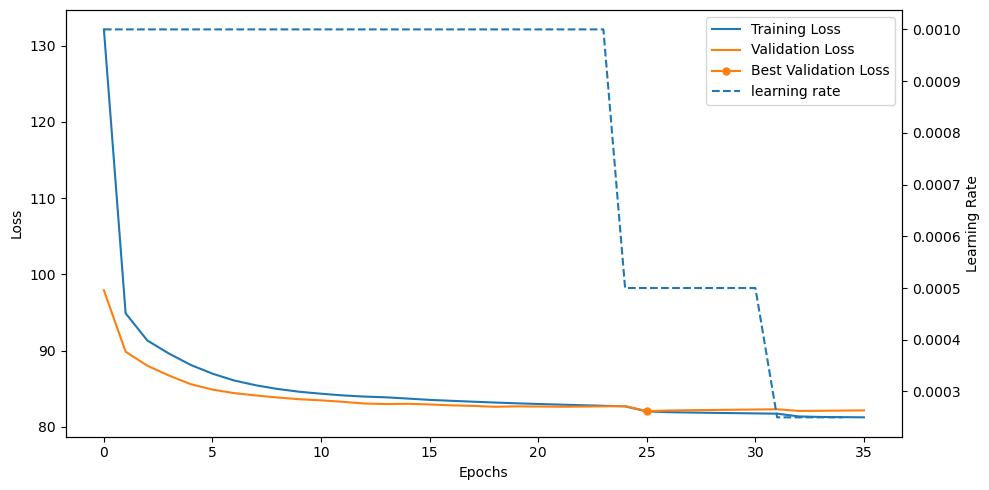

In [45]:
import pickle
from matplotlib import pyplot as plt
with open(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.history", "rb") as f: 
    hist = pickle.load(f)
# hist["train_loss"]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(hist["train_loss"], label="Training Loss", color="tab:blue")
ax.plot(hist["val_loss"], label="Validation Loss", color="tab:orange")
ax.plot(np.array(hist["val_loss"]).argmin(), hist["val_loss"][np.array(hist["val_loss"]).argmin()],
         marker="o", markersize=5, color="tab:orange", label="Best Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax2 = ax.twinx()
ax2.plot(hist["lr"], linestyle="--", label="learning rate")
ax2.set_ylabel("Learning Rate")
ax2.tick_params(axis='y')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()
plt.show()

In [24]:
test_graphs = MGNN.get_graphs("test")

In [25]:
# aux code for testing
sys.path.append('../../')
from utils import plot_mat_comp

randsample_id = np.random.randint(0, len(test_graphs))
print(f"Testing on random sample with id {randsample_id}")
test_graph = test_graphs[randsample_id]

Testing on random sample with id 31


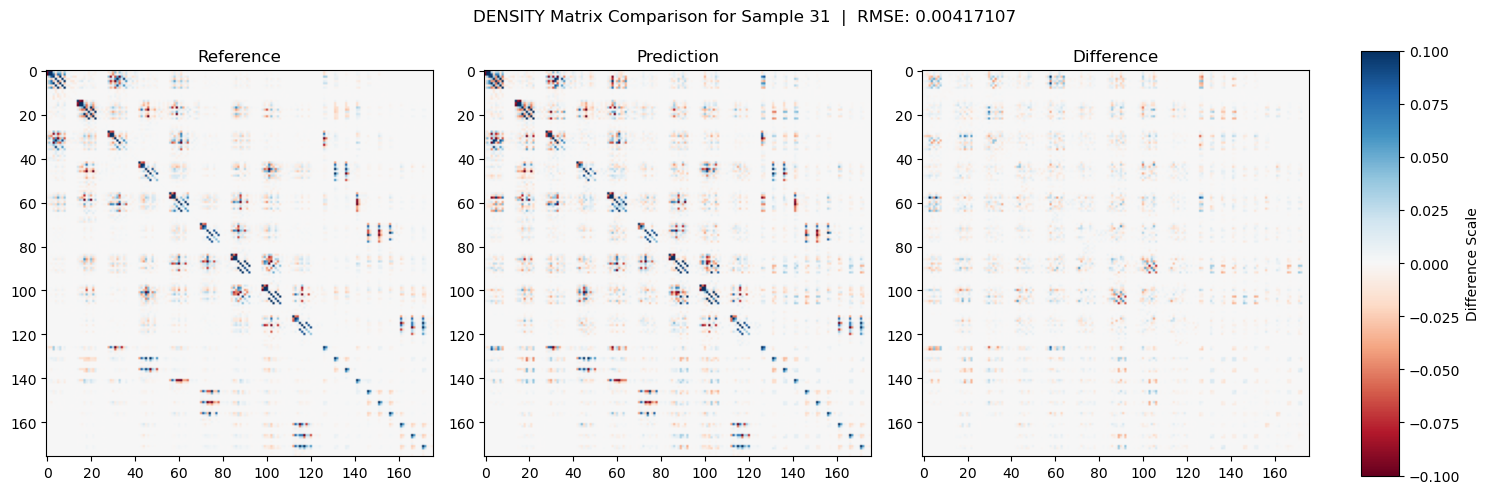

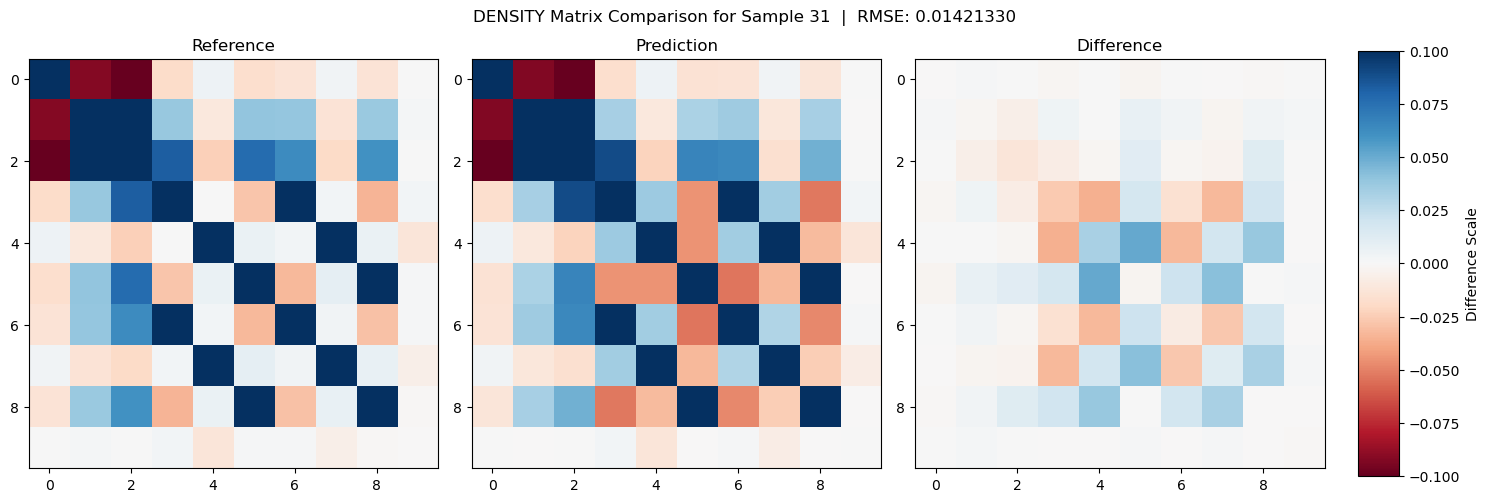

In [26]:
density_pred, density_truth = MGNN.predict([test_graph], include_target=True, transform_to_density=True)[0]
plot_mat_comp(density_pred, density_truth, 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)
plot_mat_comp(density_pred[:10,:10], density_truth[:10,:10], 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.1)

ok this already look pretty good for very few training runs!

In [19]:
from scf_guess_tools import load, calculate, guess
from scipy.linalg import eigh
from pyscf import gto, scf

In [27]:
# default calc using minao guess!
rand_file = MGNN.get_files("test")[randsample_id]
print(rand_file)
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_minao = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess="minao")

/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted/dsgdb9nsd_073806.xyz
converged SCF energy = -423.097463006896


In [28]:
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_own = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=2*density_pred)

converged SCF energy = -423.097463006988


In [10]:
# ground truth guess
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf_gt = calculate(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", guess=2*density_truth)

converged SCF energy = -423.007798085667


In [34]:
cycles_minao, cycles_own, cycles_gt = wf_minao.native.cycles, wf_own.native.cycles, wf_gt.native.cycles
print(f"Cycles with minao guess: {cycles_minao}, cycles with own guess: {cycles_own}, cycles with ground truth guess: {cycles_gt}")

Cycles with minao guess: 11, cycles with own guess: 11, cycles with ground truth guess: 6


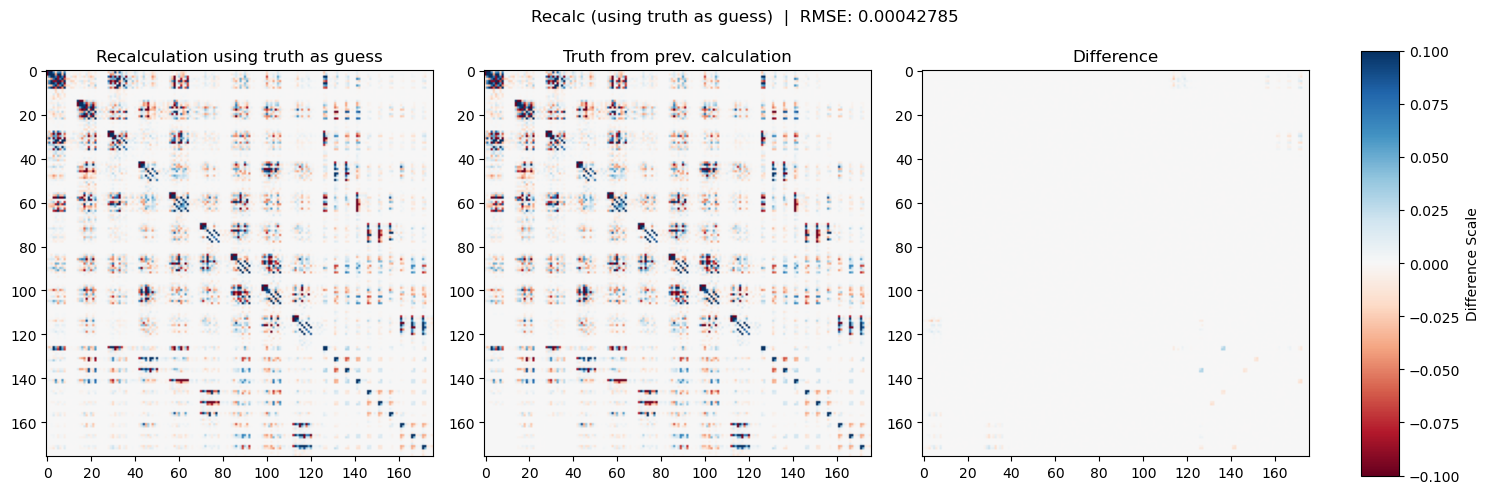

In [33]:
plot_mat_comp(wf_minao._D, density_truth*2, title="Recalc (using truth as guess)", ref_title="Recalculation using truth as guess", pred_title="Truth from prev. calculation", vmax=0.1)

#### ok already very promissing!!! Also Minao Guess looks much the same for center blocks off diag - seem to be better regarding guess!

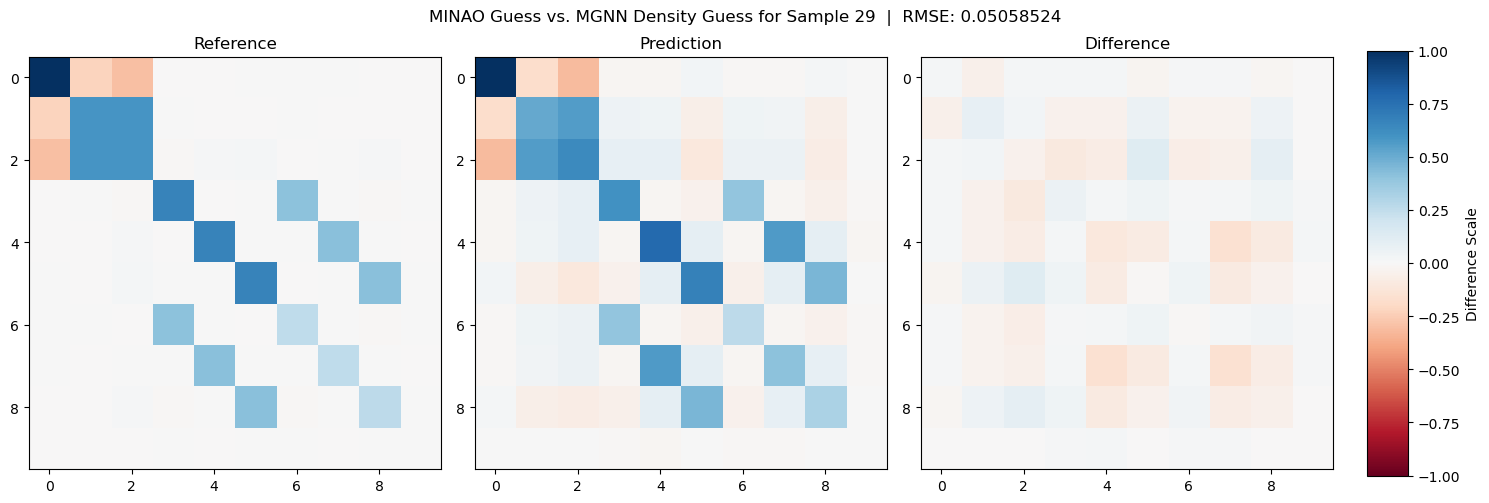

In [14]:
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
minao_guess = guess(mol, basis=BASIS_PATH, method="dft", functional="b3lypg", scheme="minao")
plot_mat_comp(minao_guess._D[:10,:10], 2*density_pred[:10,:10],
                     title=f"MINAO Guess vs. MGNN Density Guess for Sample {randsample_id}", vmax=1)